In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('./data/user_daily_fitbit_data.csv')
df = df.fillna(0)
df.head(3)

,user,date,calories,steps,sleep_start,sleep_timeInBed,sleep_minutesAsleep,sleep_awakeningsCount,sleep_minutesAwake,sleep_minutesToFallAsleep,sleep_minutesAfterWakeup,sleep_efficiency
0,myfitbit,2019-04-15,3050.7825,11614,05:44:30,211.0,187.0,0.0,0.0,0.0,0.0,0.0
1,myfitbit,2019-04-16,2217.6090,4316,01:22:00,475.0,410.0,0.0,0.0,0.0,0.0,0.0
2,myfitbit,2019-04-17,2776.5735,10469,05:19:30,238.0,216.0,0.0,0.0,0.0,0.0,0.0


## [1-a-i] 하루에 얼마나 자는가?

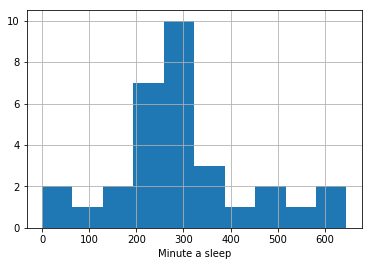

In [4]:
df['sleep_minutesAsleep'].hist()
plt.xlabel('Minute a sleep')
plt.show()

하루 수면 시간이 6시간이 안되는 경우 : 74.19%


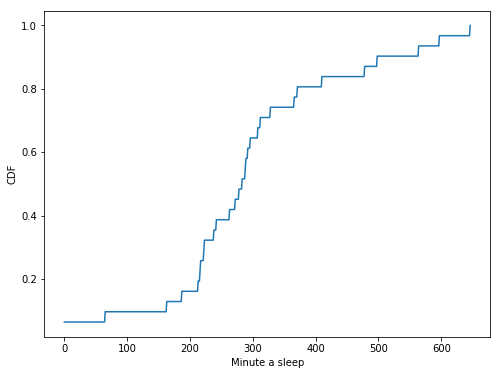

In [6]:
sleep_list = [int(sleep) for sleep in df['sleep_minutesAsleep']]
sleep_list_count = np.zeros(max(sleep_list)+1)
for sleep in sleep_list:
    sleep_list_count[int(sleep)] += 1
sleep_cumsum = sleep_list_count.cumsum()
sleep_cdf = [cumsum/sleep_cumsum[-1] for cumsum in sleep_cumsum]
print('하루 수면 시간이 6시간이 안되는 경우 : {0}%'.format(round(sleep_cdf[360]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.xlabel('Minute a sleep')
plt.ylabel('CDF')
plt.show()

## [1-a-ii] 걸음 수 데이터 파악하기

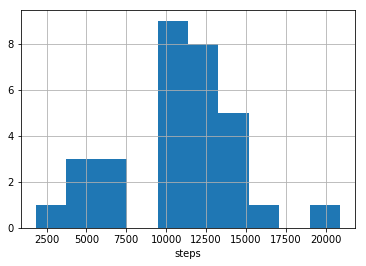

In [7]:
df['steps'].hist()
plt.xlabel('steps')
plt.show()

하루 10,000보를 달성하지 못한 경우 : 25.81%


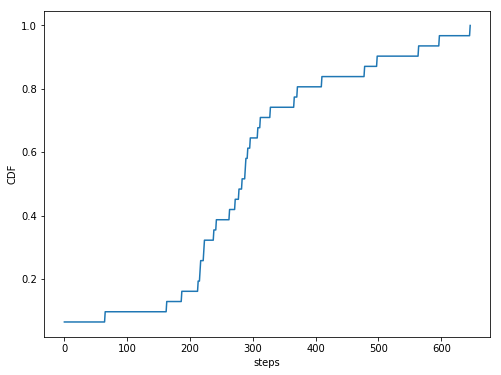

In [26]:
step_list = [int(step) for step in df['steps']]
step_list_count = np.zeros(max(step_list)+1)
for step in step_list:
    step_list_count[int(step)] += 1
step_cumsum = step_list_count.cumsum()
step_cdf = [cumsum/step_cumsum[-1] for cumsum in step_cumsum]
print('하루 10,000보를 달성하지 못한 경우 : {0}%'.format(round(step_cdf[10000]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.xlabel('steps')
plt.ylabel('CDF')
plt.show()

## [1-a-iii] 소모 칼로리 수 데이터 파악하기

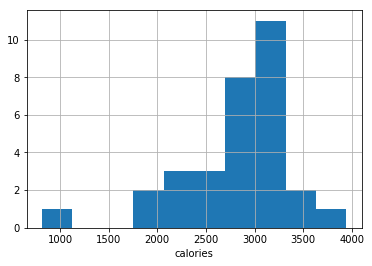

In [27]:
df['calories'].hist()
plt.xlabel('calories')
plt.show()

하루 10,000보를 달성하지 못한 경우 : 19.35%


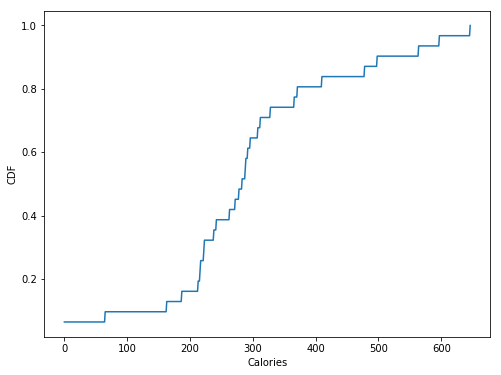

In [28]:
calorie_list = [int(calorie) for calorie in df['calories']]
calorie_list_count = np.zeros(max(calorie_list)+1)
for calorie in calorie_list:
    calorie_list_count[int(calorie)] += 1
calorie_cumsum = calorie_list_count.cumsum()
calorie_cdf = [cumsum/calorie_cumsum[-1] for cumsum in calorie_cumsum]
print('하루 10,000보를 달성하지 못한 경우 : {0}%'.format(round(calorie_cdf[2400]*100,2)))
plt.figure(figsize=(8,6))
plt.plot(sleep_cdf)
plt.xlabel('Calories')
plt.ylabel('CDF')
plt.show()

## [1-b] 데이터 상관관계

In [32]:
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df['weekday'] = df['date'].apply(lambda x: x.weekday())

C:\Users\USER\Anaconda3\envs\tf_cpu\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


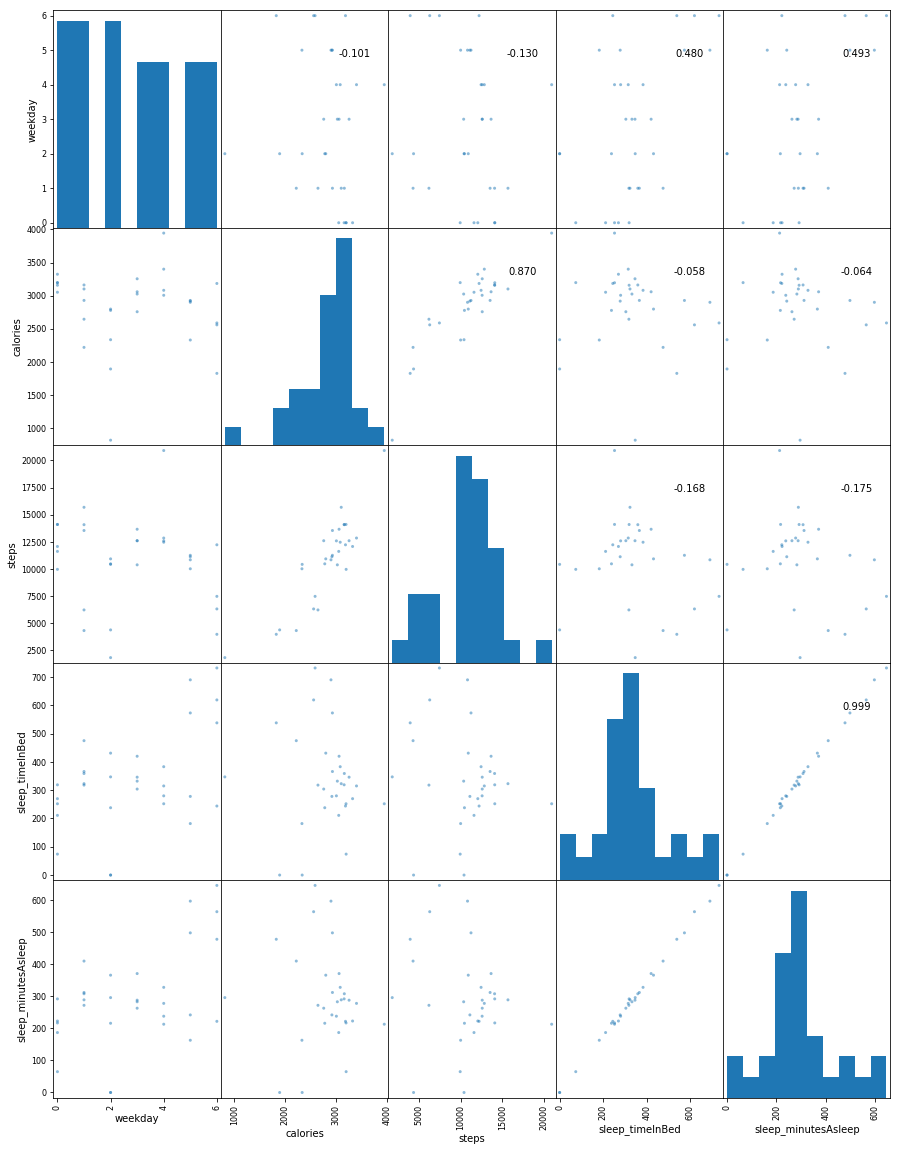

In [33]:
df_subset = df[['weekday','calories','steps','sleep_start','sleep_timeInBed','sleep_minutesAsleep']]

axes = pd.plotting.scatter_matrix(df_subset,figsize=(15,20), alpha=0.5)

corr = df_subset.corr().as_matrix()
for i, j in zip(*plt.np.triu_indices_from(axes, k=1)):
    axes[i, j].annotate("%.3f" %corr[i,j], (0.8, 0.8), xycoords='axes fraction', ha='center', va='center')
plt.show()

## [1-b-i] 각 요일별 얼마나 걷는가?

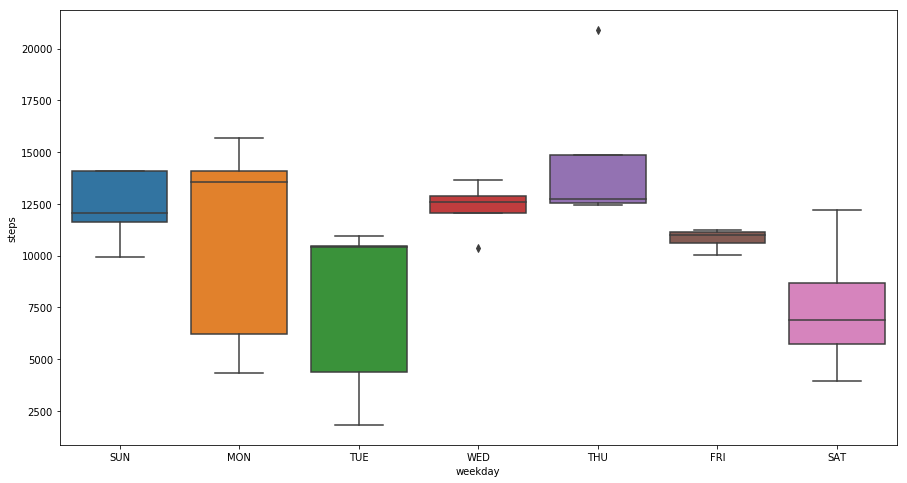

In [34]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='weekday', y='steps', data=df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()

## [1-b-ii] 각 요일별 얼마나 자는가?

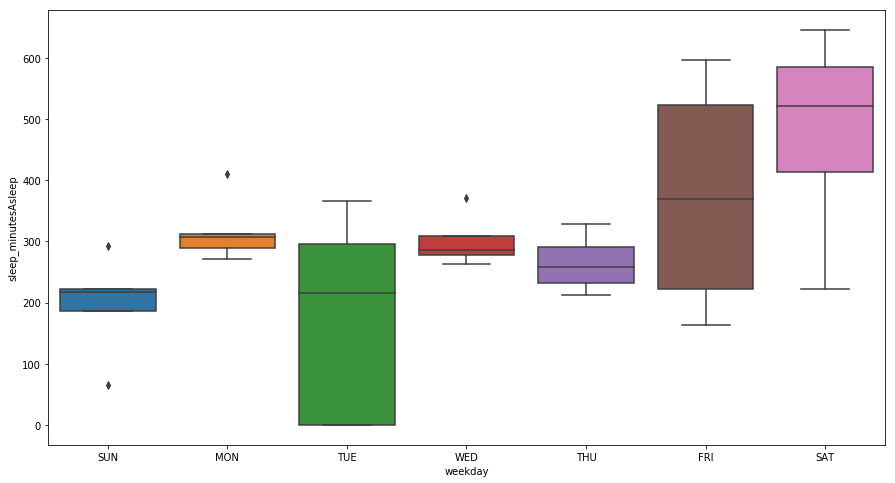

In [35]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='weekday', y='sleep_minutesAsleep', data=df)
plt.xticks(range(0,7), ['SUN','MON','TUE','WED','THU','FRI','SAT'])
plt.show()